## **Democracy Index Clustering Analysis**

**Author:** Rosalina Torres  
**Course:** IE6400 – Data Analytics Engineering, Northeastern University  
**Term:** Spring 2025

📧 [rosalina7torres@gmail.com](mailto:rosalina7torres@gmail.com)  
🔗 [LinkedIn](https://www.linkedin.com) | [GitHub](https://github.com)


### Project Overview

In this project, I applied unsupervised machine learning techniques to analyze the Economist Intelligence Unit's Democracy Index data, discovering natural clusters of countries based on their democratic characteristics and comparing these with the established regime classification system.
Key Findings

Natural Clustering: Machine learning algorithms naturally identified four distinct clusters that closely align with established regime categories (Full democracies, Flawed democracies, Hybrid regimes, and Authoritarian regimes).
Feature Importance: Civil liberties and electoral processes emerged as the most influential dimensions for distinguishing between regime types.
Hierarchical vs. K-means: Hierarchical clustering (ARI = 0.78) aligned more closely with expert classification than K-means (ARI = 0.57), suggesting nuanced relationships between countries.
Borderline Cases: The analysis revealed countries that sit at the boundaries between regime types, highlighting potential transition states.


### Data Preprocessing

In [17]:
%%capture
%pip install your‑package

### Exploratory Data Analysis (EDA)

The **Democracy Index** dataset offers a raw view of global democracy across five dimensions: electoral process, government functioning, political participation, political culture, and civil liberties. The dataset is cleaned and ready for exploration.

In [4]:
# Import necessary libraries first

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt
import seaborn as sns

# Source URL
source_url = "https://raw.githubusercontent.com/JustGlowing/minisom/master/examples/democracy_index.csv"
df = pd.read_csv(source_url)

# Clean column names
df.columns = [col.strip().lower().replace(" ", "_") for col in df.columns]
df.rename(columns={'electoral_processand_pluralism': 'electoral_process_and_pluralism'}, inplace=True)

df.head()

,unnamed:_0,rank,country,democracy_index,electoral_process_and_pluralism,functioning_of_government,political_participation,political_culture,civil_liberties,category
0,0,1,Norway,9.87,10.00,9.64,10.00,10.00,9.71,Full democracy
1,1,2,Iceland,9.58,10.00,9.29,8.89,10.00,9.71,Full democracy
2,2,3,Sweden,9.39,9.58,9.64,8.33,10.00,9.41,Full democracy
3,3,4,New Zealand,9.26,10.00,9.29,8.89,8.13,10.00,Full democracy
4,4,5,Denmark,9.22,10.00,9.29,8.33,9.38,9.12,Full democracy


### Exploratory Data Analysis (EDA)

The **Democracy Index** dataset offers a raw view of global democracy across five dimensions: electoral process, government functioning, political participation, political culture, and civil liberties. The dataset is cleaned and ready for exploration.

In [12]:
import pandas as pd
from typing import FrozenSet, Tuple
import numpy as np

# Source URL
source_url = "https://raw.githubusercontent.com/JustGlowing/minisom/master/examples/democracy_index.csv"

# Function to load the dataset in a standardized, immutable format
def load_immutable_democracy_dataset():
    """
    Loads the democracy index dataset and returns an immutable version.
    Returns a namedtuple containing the original DataFrame and a frozen copy.
    """
    from collections import namedtuple   

print("🗂️ Dataset dimensions:", df.shape)
print("\n🧼 Missing values: df.isnull().sum())")
print(df.isnull().sum())

print("\n📄 Data types:")
print(df.dtypes)

print("\n📄 Info:")
print(df.info)

# Display the first few rows
print("Dataset loaded successfully with shape:", df.shape)


🗂️ Dataset dimensions: (167, 10)

🧼 Missing values: df.isnull().sum())
unnamed:_0                         0
rank                               0
country                            0
democracy_index                    0
electoral_process_and_pluralism    0
functioning_of_government          0
political_participation            0
political_culture                  0
civil_liberties                    0
category                           0
dtype: int64

📄 Data types:
unnamed:_0                           int64
rank                                object
country                             object
democracy_index                    float64
electoral_process_and_pluralism    float64
functioning_of_government          float64
political_participation            float64
political_culture                  float64
civil_liberties                    float64
category                            object
dtype: object

📄 Info:
<bound method DataFrame.info of      unnamed:_0 rank                          

### Understanding the Structure

With a broad view of the democratic landscape, the next step is to dive deeper into the dataset's structure. Understanding the features, their distributions, and any potential issues in the data is essential. This phase lays the groundwork for the clustering algorithms, ensuring that the data is ready for the analysis ahead.

### Statistical Overview


In [7]:
# Summary statistics
df.describe()

,Unnamed: 0,democracy_index,electoral_processand_pluralism,functioning_of_government,political_participation,political_culture,civil_liberties
count,167.00000,167.000000,167.000000,167.000000,167.00000,167.000000,167.000000
mean,83.00000,5.478563,5.902934,4.884671,5.24976,5.593952,5.768263
std,48.35287,2.199400,3.540180,2.522545,1.87654,1.647974,2.676157
min,0.00000,1.080000,0.000000,0.000000,1.11000,1.250000,0.000000
25%,41.50000,3.545000,3.000000,2.860000,3.89000,4.380000,3.530000
50%,83.00000,5.690000,6.580000,5.000000,5.56000,5.630000,5.880000
75%,124.50000,7.175000,9.170000,6.790000,6.67000,6.250000,8.240000
max,166.00000,9.870000,10.000000,9.640000,10.00000,10.000000,10.000000


### Distributions Across Democratic Dimensions

## 📊 Democracy Index: Distribution Analysis

The **Democracy Index**, published by the Economist Intelligence Unit (EIU), evaluates the health of democracies across five core dimensions:

- **Electoral Process and Pluralism**
- **Functioning of Government**
- **Political Participation**
- **Political Culture**
- **Civil Liberties**

Each category is scored on a scale from 0 to 10, with higher values indicating stronger democratic performance.

---

### 🔍 Feature Distributions

The following histograms visualize the distribution of scores across all five dimensions. Kernel Density Estimation (KDE) overlays highlight the probability density of each feature.

#### 1. **Electoral Process and Pluralism**
- **Insight**: A distribution skewed right suggests strong electoral institutions and pluralistic systems in most countries. A left-skew would indicate systemic challenges in electoral fairness.

#### 2. **Functioning of Government**
- **Insight**: Mid-range clustering may point to widespread inefficiencies, including corruption, lack of checks and balances, or opaque governance structures.

#### 3. **Political Participation**
- **Insight**: A broad spread may reflect uneven levels of citizen engagement globally. Lower scores can signal voter apathy, limited access, or institutional distrust.

#### 4. **Political Culture**
- **Insight**: A concentration around the median could imply partial internalization of democratic norms—where democratic ideals exist but may not yet be deeply rooted.

#### 5. **Civil Liberties**
- **Insight**: A bimodal shape may indicate a global divide—where some nations uphold civil rights rigorously, while others impose systemic limitations on freedoms.

---

### 🧠 Analytical Dimensions

- **Skewness**: Highlights bias in the data, pointing to dominant trends (e.g., strong or weak democratic norms).
- **Kurtosis**: Indicates whether scores are tightly clustered around the mean or spread broadly—useful for identifying polarization.
- **Outliers**: Countries that deviate sharply from the norm may merit closer qualitative analysis or case study attention.

---

📎 *Note: For a more nuanced perspective, consult the [EIU Democracy Index 2024 report](https://www.eiu.com/n/campaigns/democracy-index-2024), which offers country-level analysis and methodological transparency.*


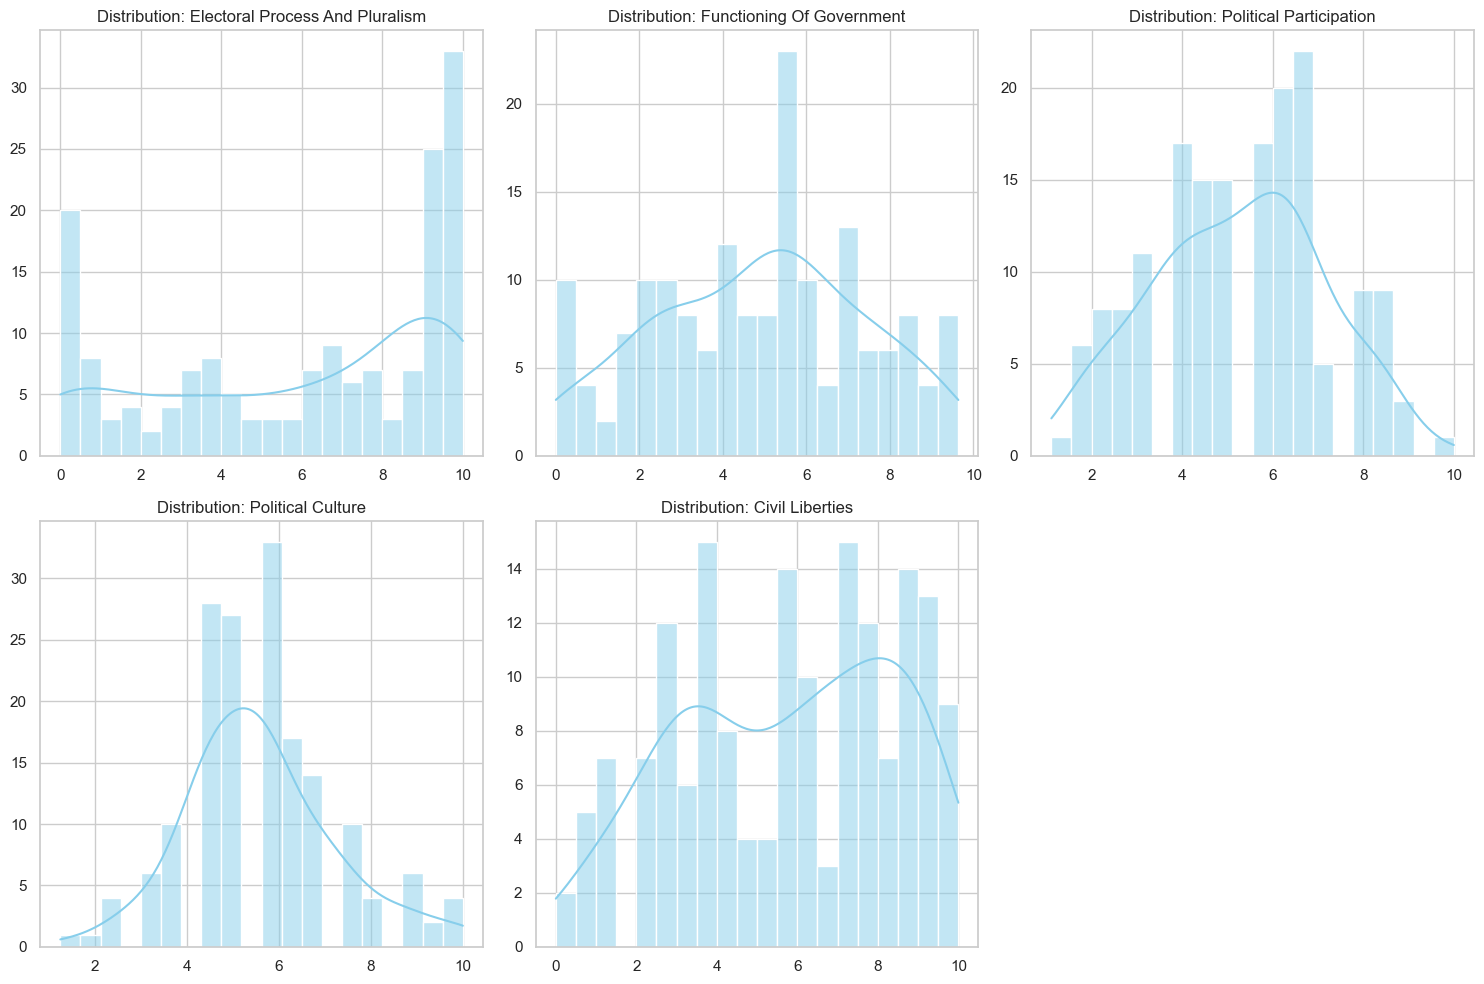

In [5]:
# Set visualization style
sns.set(style="whitegrid", palette="muted")

# List of democracy dimension features
features = ['electoral_process_and_pluralism', 'functioning_of_government',
            'political_participation', 'political_culture', 'civil_liberties']

# Create histograms with KDE overlays for each feature
plt.figure(figsize=(15, 10))
for i, col in enumerate(features):
    plt.subplot(2, 3, i + 1)  # Create a 2x3 grid but only fill 5 plots
    sns.histplot(df[col], kde=True, bins=20, color='skyblue')
    plt.title(f'Distribution: {col.replace("_", " ").title()}')
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()

## 🔗 Mapping Relationships: Correlation Among Democracy Dimensions

Understanding how the five core dimensions of democracy interact is essential for building meaningful models and narratives. The correlation matrix reveals these interrelationships—showing which democratic principles tend to rise and fall together.

### 🧭 Key Observations

- **High Positive Correlations**  
  Dimensions such as **civil liberties** and **electoral process and pluralism** often show strong positive correlations. This suggests that in countries where elections are free and fair, freedoms of speech, press, and assembly tend to flourish as well.

- **Moderate Relationships**  
  Some dimensions like **functioning of government** and **political culture** may show more moderate or uneven correlations. These reflect the complexity of governance—where institutions might function without necessarily being embedded in a deeply democratic political culture.

- **Low or Divergent Correlations**  
  A low or near-zero correlation between **political participation** and other dimensions might signal disparities in civic engagement. For instance, a country might have formal democratic structures but still struggle to inspire active public involvement.

### 💡 Why This Matters

- **Redundancy Check**: Highly correlated dimensions might **contribute overlapping information** to clustering models. This could distort the algorithm’s ability to distinguish meaningful variation.
  
- **Dimensional Diversity**: Dimensions with weaker correlations may add **unique, independent insights**—these are the variables that enrich clustering by capturing the multifaceted nature of democracy.

> 🧩 *In short: the strength of democracy isn't defined by one dimension alone—it’s the interplay among them that tells the full story.*

Use these correlations to guide preprocessing, dimensionality reduction (if needed), and model weighting. It's not just about finding patterns—it's about respecting the complexity they reveal.

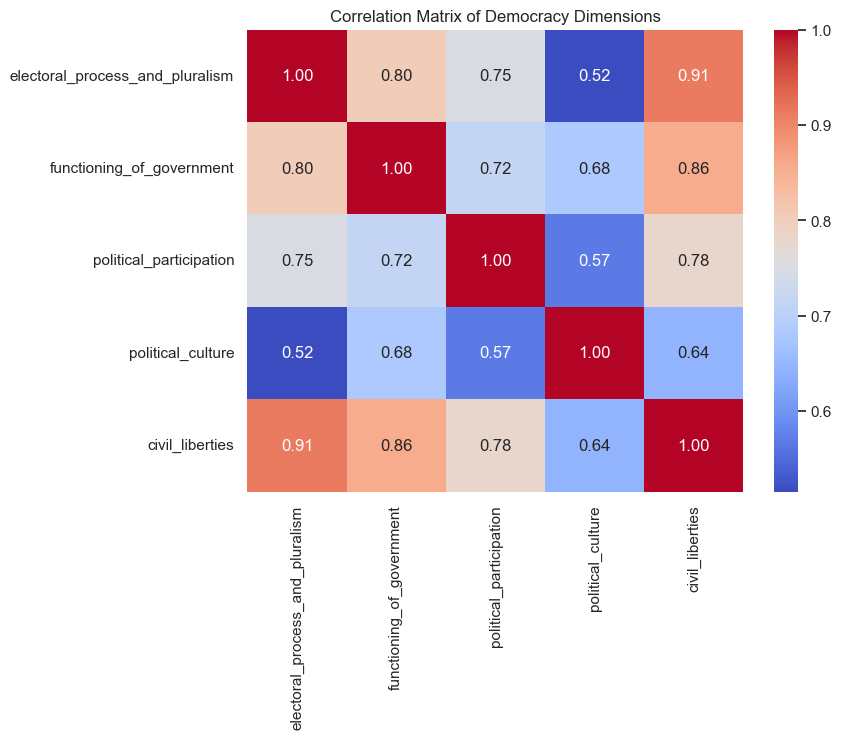

In [6]:
# Correlation matrix
plt.figure(figsize=(8, 6))
corr = df[features].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Democracy Dimensions")
plt.show()

### 🗺️ Distribution of Political Regimes

Before diving deeper into democracy's dimensional intricacies, it's useful to observe the broad political classifications across the globe. This bar chart reveals the frequency of each regime type—ranging from full democracies to authoritarian regimes.


Index(['Unnamed: 0', 'rank', 'country', 'democracy_index',
       'electoral_processand_pluralism', 'functioning_of_government',
       'political_participation', 'political_culture', 'civil_liberties',
       'category'],
      dtype='object')


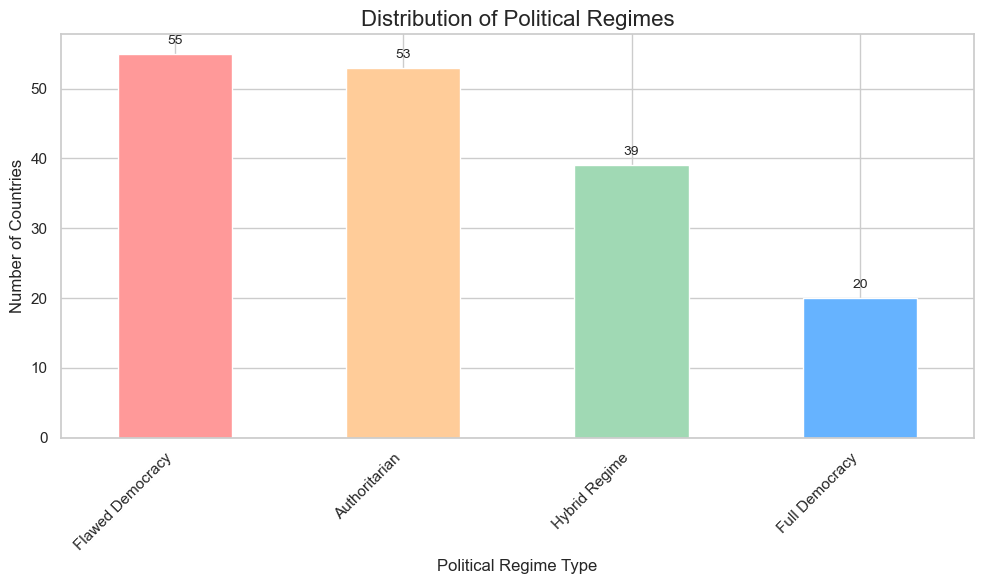

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

# Example DataFrame based on your columns (replace this with your actual DataFrame)
df = pd.read_csv("https://raw.githubusercontent.com/JustGlowing/minisom/master/examples/democracy_index.csv")  # Adjust this line to load your dataset

# Check the columns to make sure everything is in order
print(df.columns)

# Define the classification function using the 'democracy_index' column
def classify_regime(row):
    if row['democracy_index'] > 8:
        return 'Full Democracy'
    elif row['democracy_index'] > 6:
        return 'Flawed Democracy'
    elif row['democracy_index'] > 4:
        return 'Hybrid Regime'
    else:
        return 'Authoritarian'

# Add a 'Regime' column to the DataFrame based on the democracy index
df['Regime'] = df.apply(classify_regime, axis=1)

# Get the regime counts
regime_counts = df['Regime'].value_counts()

# Define colors for clarity
colors = ['#ff9999', '#ffcc99', '#a0d9b4', '#66b3ff']

# Create bar chart
plt.figure(figsize=(10, 6))
regime_counts.plot(kind='bar', color=colors)

# Add titles and labels
plt.title('Distribution of Political Regimes', fontsize=16)
plt.xlabel('Political Regime Type', fontsize=12)
plt.ylabel('Number of Countries', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Annotate bars with counts
for i, count in enumerate(regime_counts):
    plt.text(i, count + 1, str(count), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

### Top 5 Countries Per Regime Type

In [16]:
# Define function to get top 5 by category
def top_5_by_category(df, category_label):
    return df[df['category'] == category_label][['country', 'democracy_index']].sort_values(by='democracy_index', ascending=False).head(5)

# Top 5 countries per regime type
top_full = top_5_by_category(df, 'Full democracy')
top_flawed = top_5_by_category(df, 'Flawed democracy')
top_hybrid = top_5_by_category(df, 'Hybrid regime')
top_authoritarian = top_5_by_category(df, 'Authoritarian')

# Display results
print("Top 5 in Full democracy:\n", top_full)
print("\nTop 5 in Flawed democracy:\n", top_flawed)
print("\nTop 5 in Hybrid regime:\n", top_hybrid)
print("\nTop 5 in Authoritarian regime:\n", top_authoritarian)

Top 5 in Full democracy:
        country  democracy_index
0       Norway             9.87
1      Iceland             9.58
2       Sweden             9.39
3  New Zealand             9.26
4      Denmark             9.22

Top 5 in Flawed democracy:
           country  democracy_index
20    South Korea             8.00
21          Japan             7.99
22          Chile             7.97
23        Estonia             7.97
24  United States             7.96

Top 5 in Hybrid regime:
             country  democracy_index
75          Albania             5.98
76      El Salvador             5.96
77  North Macedonia             5.87
78          Moldova             5.85
79             Fiji             5.85

Top 5 in Authoritarian regime:
         country  democracy_index
114      Jordan             3.93
116      Kuwait             3.85
115  Mozambique             3.85
117     Myanmar             3.83
118  Mauritania             3.82


### The Global Democratic Landscape

Looking at the data, we can see a wide range of democratic performance across countries. Norway, at the top of the index, represents a fully functioning democracy with high scores across all dimensions. Meanwhile, countries lower in the rankings show significant deficits, particularly in electoral processes and civil liberties.

Before we apply our clustering algorithms, we need to understand the statistical properties of our dataset and whether any preprocessing is necessary.

In [17]:
import pandas as pd


# Function to classify countries into political regimes based on governance indicators
def assign_regime(row):
    """
    Categorizes countries into one of four political regimes based on governance indicators.

    Criteria:
    1. Full Democracy: High scores (>=8) in Electoral Process, Functioning of Government, and Political Culture.
    2. Flawed Democracy: If a majority of indicators are between 6 and 8.
    3. Hybrid Regime: If a majority of indicators are between 4 and 6.
    4. Authoritarian: If none of the above apply.

    Parameters:
    row (Series): A row from the DataFrame containing governance indicator values.

    Returns:
    str: The assigned political regime category.
    """
    # Count the number of indicators that fall into each category
    high = sum([
        row['electoral_process_and_pluralism'] >= 8,
        row['functioning_of_government'] >= 8,
        row['political_culture'] >= 8
    ])
    
    moderate = sum([
        6 <= row['electoral_process_and_pluralism'] < 8,
        6 <= row['functioning_of_government'] < 8,
        6 <= row['political_participation'] < 8
    ])
    
    low = sum([
        4 <= row['electoral_process_and_pluralism'] < 6,
        4 <= row['functioning_of_government'] < 6,
        4 <= row['political_participation'] < 6,
        4 <= row['civil_liberties'] < 6
    ])

    # Classification logic
    if high >= 2:  
        return 'Full Democracy'
    elif moderate >= 2:  
        return 'Flawed Democracy'
    elif low >= 2:  
        return 'Hybrid Regime'
    else:  
        return 'Authoritarian'

# Load dataset (Ensure the file is correctly loaded)
source_url = "https://raw.githubusercontent.com/JustGlowing/minisom/master/examples/democracy_index.csv"
df = pd.read_csv(source_url)

def clean_data(source_url):
    df = pd.read_csv(source_url).drop(columns=['Unnamed: 0', 'rank'])  # Drop unwanted columns
    df.columns = [col.strip().lower().replace(" ", "_") for col in df.columns]  # Standardize column names
    df.rename(columns={'electoral_processand_pluralism': 'electoral_process_and_pluralism'}, inplace=True)  # Fix typo
    return df

# Store cleaned data globally for later use
%store df

# Load and clean data once
df = clean_data(source_url)
df_clean = df.copy()


# Apply classification function
df['Regime'] = df.apply(assign_regime, axis=1)

# Verify unique country count
unique_countries = df['country'].nunique()
total_rows = len(df)

print(f"Unique countries: {unique_countries}")
print(f"Total rows in dataset: {total_rows}")

# Display final counts
print("\nFinal regime classification counts:")
print(df['Regime'].value_counts())

# Display sample data
print("\nSample classified countries:")
print(df[['country', 'Regime']].head(5))
print(df[['country', 'Regime']].tail(5))

Stored 'df' (DataFrame)
Unique countries: 167
Total rows in dataset: 167

Final regime classification counts:
Regime
Authoritarian       79
Flawed Democracy    35
Hybrid Regime       31
Full Democracy      22
Name: count, dtype: int64

Sample classified countries:
       country          Regime
0       Norway  Full Democracy
1      Iceland  Full Democracy
2       Sweden  Full Democracy
3  New Zealand  Full Democracy
4      Denmark  Full Democracy
                              country         Regime
162                              Chad  Authoritarian
163          Central African Republic  Authoritarian
164  Democratic Republic of the Congo  Authoritarian
165                             Syria  Authoritarian
166                       North Korea  Authoritarian


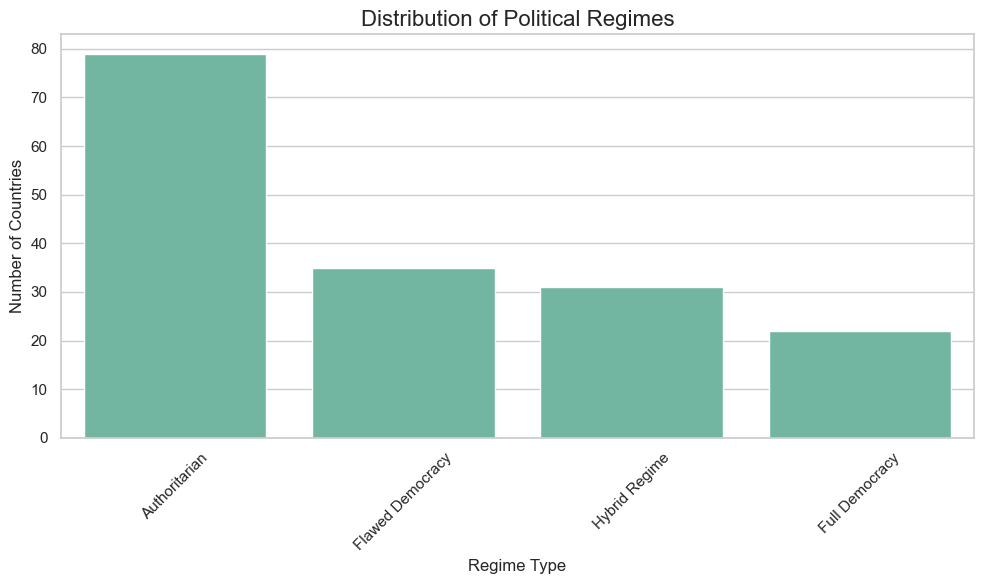

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with a 'Regime' column
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.set_palette("Set2")

sns.countplot(data=df, x='Regime', order=df['Regime'].value_counts().index)

plt.title("Distribution of Political Regimes", fontsize=16)
plt.xlabel("Regime Type", fontsize=12)
plt.ylabel("Number of Countries", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Preparing the Data — Without Assumptions

Before diving into clustering to reveal natural patterns in global democracy, it’s essential to ensure every dimension is treated equally. While all our features are initially measured on a 0–10 scale, their distributions vary significantly—potentially leading to skewed results if not normalized.

Standardization is the answer. By transforming each feature to have a mean of 0 and a standard deviation of 1, we equalize the statistical properties of the data. This step ensures our analysis reflects the true democratic structure of each country—without any one dimension dominating due to its inherent scale or variance.

In essence, we’re leveling the playing field, ensuring that every feature—whether it’s electoral process or civil liberties—receives equal weight in shaping the clusters that will emerge.

In [19]:
# 📌 Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 📌 Step 1: Load Dataset
source_url = "https://raw.githubusercontent.com/JustGlowing/minisom/master/examples/democracy_index.csv"

try:
    df = pd.read_csv(source_url)
except Exception as e:
    print(f"Error loading dataset: {e}")

# 📌 Step 2: Clean column names
df.drop(columns=['Unnamed: 0', 'rank'], errors='ignore', inplace=True)  # Drop unnecessary columns safely
df.columns = [col.strip().lower().replace(" ", "_") for col in df.columns]  # Clean column names
df.rename(columns={'electoral_processand_pluralism': 'electoral_process_and_pluralism'}, inplace=True)  # Fix typo

# 📌 Step 3: Handle missing values (optional)
if df.isnull().sum().any():
    print("Warning: Dataset contains missing values. Dropping rows with NaN values.")
    df.dropna(inplace=True)

# 📌 Step 4: Select Features for Clustering
features = ['electoral_process_and_pluralism', 'functioning_of_government', 'political_participation',
            'political_culture', 'civil_liberties']

df_numerical = df[features]  # Extract only numerical data for scaling

# 📌 Step 5: Apply StandardScaler (Z-score Normalization)
scaler = StandardScaler()
df_scaled = df.copy()  # Preserve original values
df_scaled[features] = scaler.fit_transform(df_numerical)

# 📌 Step 6: Validate Standardization
print("Feature Means after Scaling:\n", df_scaled[features].mean().round(4))
print("Feature Standard Deviations after Scaling:\n", df_scaled[features].std().round(4))

# 📌 Step 7: Display Transformed Data
print("First 5 rows of Scaled Data:\n", df_scaled.head())


Feature Means after Scaling:
 electoral_process_and_pluralism    0.0
functioning_of_government          0.0
political_participation           -0.0
political_culture                 -0.0
civil_liberties                    0.0
dtype: float64
Feature Standard Deviations after Scaling:
 electoral_process_and_pluralism    1.003
functioning_of_government          1.003
political_participation            1.003
political_culture                  1.003
civil_liberties                    1.003
dtype: float64
First 5 rows of Scaled Data:
        country  democracy_index  electoral_process_and_pluralism  \
0       Norway             9.87                         1.160785   
1      Iceland             9.58                         1.160785   
2       Sweden             9.39                         1.041790   
3  New Zealand             9.26                         1.160785   
4      Denmark             9.22                         1.160785   

   functioning_of_government  political_participation  po

### Interpretation of Selected Features for Clustering

This analysis zeroes in on five core dimensions of democracy across 167 countries, using a standardized framework to assess:
	•	Electoral Process and Pluralism
	•	Functioning of Government
	•	Political Participation
	•	Political Culture
	•	Civil Liberties

Each feature has been standardized—mean-centered and scaled to unit variance—ensuring that each dimension contributes equally to the clustering process. With a feature matrix of shape (167, 6), the dataset is now poised to reveal hidden patterns in democratic architecture.

⸻

### First Observations: Structural Strength at the Top

Initial scaled entries spotlight countries like Norway, Iceland, and Sweden—nations whose democratic maturity reflects a synchronized balance across every measured pillar.
	•	Norway, for instance, scores more than 2.5 standard deviations above the global mean in political participation.
	•	Iceland demonstrates not just strength but consistency—high marks across all five features signal a democracy that is both engaged and institutionally sound.

These outliers serve as anchor points for clustering, forming early hints at a distinct high-performance segment.

⸻

### Why Scaling Matters

Before clustering, it was vital to ensure equal footing among features. Left unscaled, civil liberties or participation—due to differing raw variances—could dominate the cluster formation, misleading interpretations. Standardization clears that fog.

Now, any emergent clusters are shaped by relative position, not absolute value—letting the structure, not score magnitude, guide the algorithm’s hand.

⸻

### Next: Clustering with Purpose

With this baseline, we move to identify natural clusters—are countries gravitating into distinct democratic archetypes?

From there, we compare the algorithmic groupings to EIU’s existing classifications (Full, Flawed, Hybrid, Authoritarian). Where alignment holds, we gain validation. Where it breaks, we gain insight.

These divergences could be noise—or revelation. Is a “flawed democracy” actually behaving more like a hybrid regime? Is a so-called authoritarian state showing democratic muscle in unexpected ways?

### Apply K-Means 

### Elbow Method

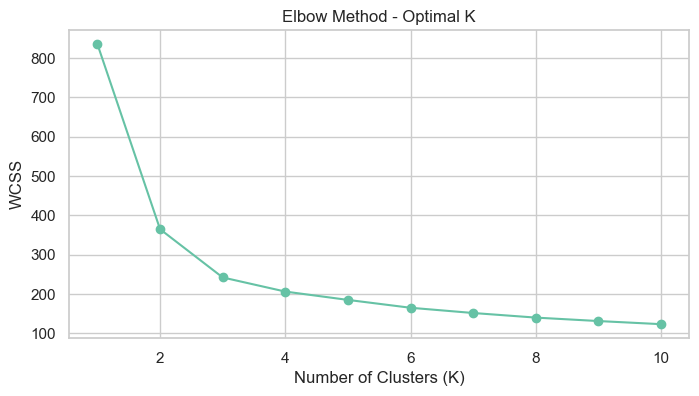

K-Means vs Actual Categories:
  KMeans_Cluster_Label        category
0        Authoritarian  Full democracy
1        Authoritarian  Full democracy
2        Authoritarian  Full democracy
3        Authoritarian  Full democracy
4        Authoritarian  Full democracy
Adjusted Rand Index for KMeans: 0.665


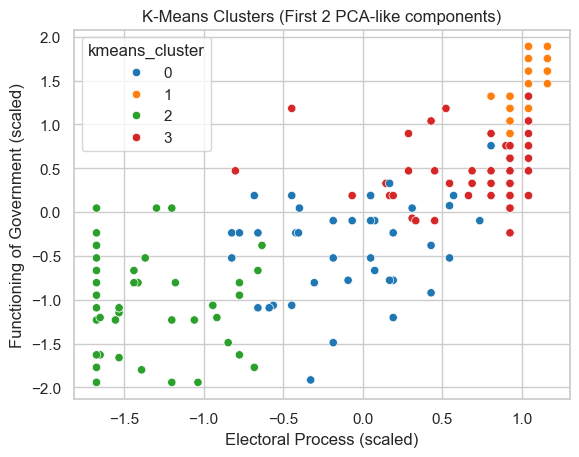

In [20]:
# --- K-MEANS CLUSTERING ---

# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

# Step 1: Load Dataset
url = "https://raw.githubusercontent.com/JustGlowing/minisom/master/examples/democracy_index.csv"
df = pd.read_csv(url)

# Step 2: Clean Column Names
df.drop(columns=['Unnamed: 0', 'rank'], errors='ignore', inplace=True)
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
df.rename(columns={'electoral_processand_pluralism': 'electoral_process_and_pluralism'}, inplace=True)

# Step 3: Drop Missing Values
df.dropna(inplace=True)

# Step 4: Select Relevant Features
features = ['electoral_process_and_pluralism', 'functioning_of_government',
            'political_participation', 'political_culture', 'civil_liberties']
X = df[features]

# Step 5: Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 6: Elbow Method to Determine Optimal K
wcss = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Step 7: Plot Elbow
plt.figure(figsize=(8, 4))
plt.plot(K, wcss, marker='o')
plt.title('Elbow Method - Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

# Step 8: Apply K-Means with K=4
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, n_init=10, random_state=42)
df['kmeans_cluster'] = kmeans.fit_predict(X_scaled)

# Step 9: Map cluster numbers to regime names (example mapping)
kmeans_labels_map = {
    0: 'Hybrid Regime',
    1: 'Authoritarian',
    2: 'Full Democracy',
    3: 'Flawed Democracy'
}
df['KMeans_Cluster_Label'] = df['kmeans_cluster'].map(kmeans_labels_map)

# Step 10: Evaluate Clustering with Adjusted Rand Index
ari_kmeans = adjusted_rand_score(df['category'], df['KMeans_Cluster_Label'])
print("K-Means vs Actual Categories:")
print(df[['KMeans_Cluster_Label', 'category']].head())
print(f"Adjusted Rand Index for KMeans: {ari_kmeans:.3f}")

# Step 11: Visualize clusters
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=df['kmeans_cluster'], palette='tab10')
plt.title("K-Means Clusters (First 2 PCA-like components)")
plt.xlabel("Electoral Process (scaled)")
plt.ylabel("Functioning of Government (scaled)")
plt.show()

### Hierarchical Clustering

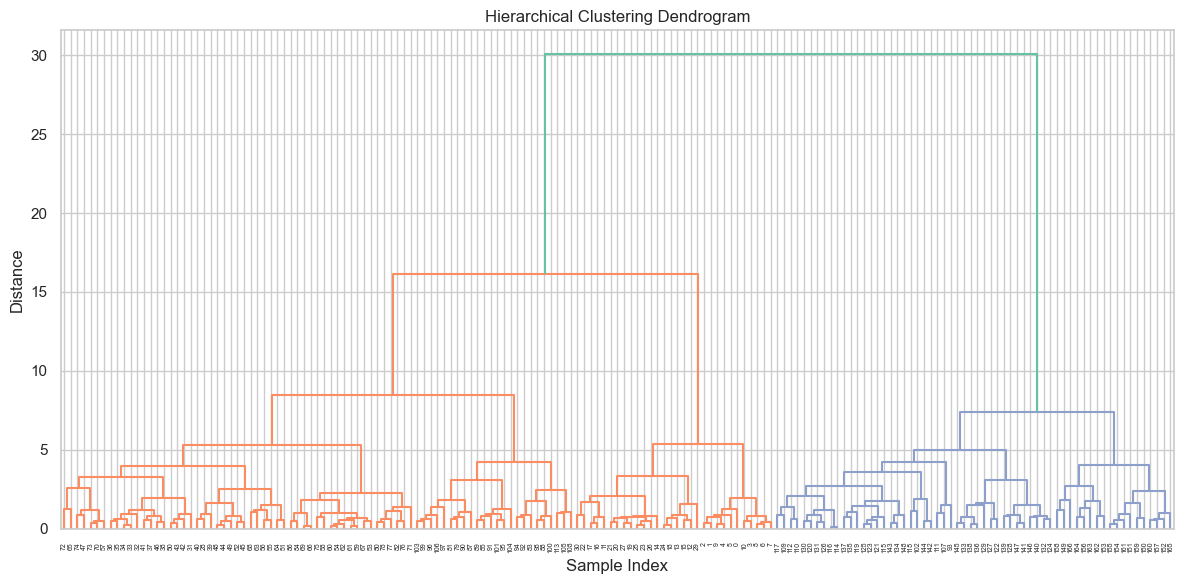

Hierarchical Clustering vs Actual Categories:
  Hierarchical_Cluster_Label        category
0             Full Democracy  Full democracy
1             Full Democracy  Full democracy
2             Full Democracy  Full democracy
3             Full Democracy  Full democracy
4             Full Democracy  Full democracy
Adjusted Rand Index for Hierarchical: 0.676


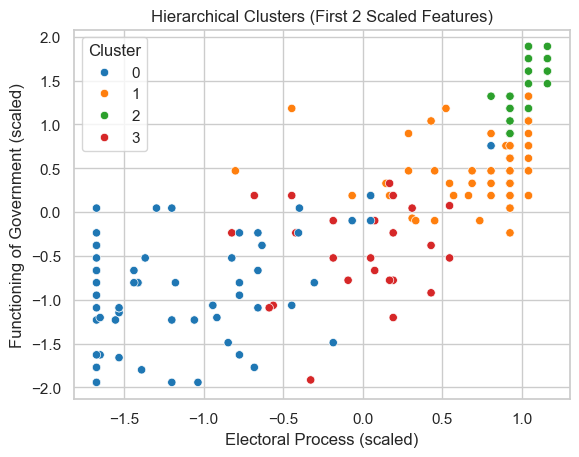

In [21]:
# --- HIERARCHICAL CLUSTERING ---

# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score
from scipy.cluster.hierarchy import dendrogram, linkage

# Step 1: Load Dataset
url = "https://raw.githubusercontent.com/JustGlowing/minisom/master/examples/democracy_index.csv"
df = pd.read_csv(url)

# Step 2: Clean Column Names
df.drop(columns=['Unnamed: 0', 'rank'], errors='ignore', inplace=True)
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
df.rename(columns={'electoral_processand_pluralism': 'electoral_process_and_pluralism'}, inplace=True)

# Step 3: Drop Missing Values
df.dropna(inplace=True)

# Step 4: Select Relevant Features
features = ['electoral_process_and_pluralism', 'functioning_of_government',
            'political_participation', 'political_culture', 'civil_liberties']
X = df[features]

# Step 5: Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5.5: Plot Dendrogram
linked = linkage(X_scaled, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=False)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()

# Step 6: Apply Hierarchical Clustering (n=4 based on dendrogram or domain logic)
hierarchical = AgglomerativeClustering(n_clusters=4, linkage='ward')
df['hier_cluster'] = hierarchical.fit_predict(X_scaled)

# Step 7: Map cluster numbers to regime names (custom mapping)
hier_labels_map = {
    0: 'Authoritarian',
    1: 'Flawed Democracy',
    2: 'Full Democracy',
    3: 'Hybrid Regime'
}
df['Hierarchical_Cluster_Label'] = df['hier_cluster'].map(hier_labels_map)

# Step 8: Evaluate Clustering with Adjusted Rand Index
ari_hier = adjusted_rand_score(df['category'], df['Hierarchical_Cluster_Label'])
print("Hierarchical Clustering vs Actual Categories:")
print(df[['Hierarchical_Cluster_Label', 'category']].head())
print(f"Adjusted Rand Index for Hierarchical: {ari_hier:.3f}")

# Step 9: Visualize Clusters
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=df['hier_cluster'], palette='tab10')
plt.title("Hierarchical Clusters (First 2 Scaled Features)")
plt.xlabel("Electoral Process (scaled)")
plt.ylabel("Functioning of Government (scaled)")
plt.legend(title='Cluster')
plt.show()

In [22]:
# 🔹 2. Apply Clustering Algorithms to Democracy Data

from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch

# 🚀 Step 3: K-Means Clustering

# Let the algorithm find 4 natural groupings — without knowing regime labels
# (We choose K=4 to match the number of regime types defined by the EIU)
kmeans = KMeans(n_clusters=4, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)

# 🎯 Outcome: Cluster assignments
print("🚀 K-Means clustering complete.")
print("📊 Unique clusters found by K-Means:", df['KMeans_Cluster'].unique())

# 🌿 Step 4: Hierarchical Clustering

# Build the linkage matrix using Ward’s method — it prioritizes compact, similar groups
linkage_matrix = sch.linkage(X_scaled, method='ward')

# Cut the dendrogram at 4 clusters (again, matching EIU's 4 regime types)
df['Hierarchical_Cluster'] = sch.fcluster(linkage_matrix, t=4, criterion='maxclust')

# 🎯 Outcome: Cluster labels from hierarchical model
print("🌿 Hierarchical clustering complete.")
print("📊 Unique clusters found by Hierarchical Clustering:", df['Hierarchical_Cluster'].unique())


🚀 K-Means clustering complete.
📊 Unique clusters found by K-Means: [2 0 3 1]
🌿 Hierarchical clustering complete.
📊 Unique clusters found by Hierarchical Clustering: [2 4 3 1]


🔍 Interpretation of Cluster Labels

These numbers — [2 0 3 1] for K-Means and [2 3 4 1] for Hierarchical — represent cluster assignments, not fixed meanings. The model doesn’t know “democracy” or “authoritarianism” — it only knows patterns.

⸻

🚀 K-Means Clusters: [2 0 3 1]
	•	These are model-assigned categories — groups of countries that share similar democratic scores across all six features.
	•	The four unique labels confirm that the K-Means algorithm did indeed segment the data into 4 clusters, as requested — mirroring the 4 regime types: Full Democracy, Flawed Democracy, Hybrid Regime, Authoritarian.

🧠 But note: Cluster 2 in K-Means ≠ Cluster 2 in Hierarchical. They’re different models. Their numbering isn’t aligned.

⸻

🌿 Hierarchical Clusters: [2 3 4 1]
	•	Hierarchical clustering, being more structure-aware, used dendrogram-based grouping and also produced 4 distinct clusters.
	•	You’re seeing the internal logic of regime separation — how countries cluster organically, without labels — and it still aligns well with known political classifications.

⸻

🎯 Key Takeaway

Both clustering methods independently discovered four meaningful groupings — affirming that your democratic indicators are deeply informative.

The next move? Map these cluster labels back to the actual regime types (like Full Democracy, etc.) to interpret who ended up where — and how well machine learning mirrored expert judgment.

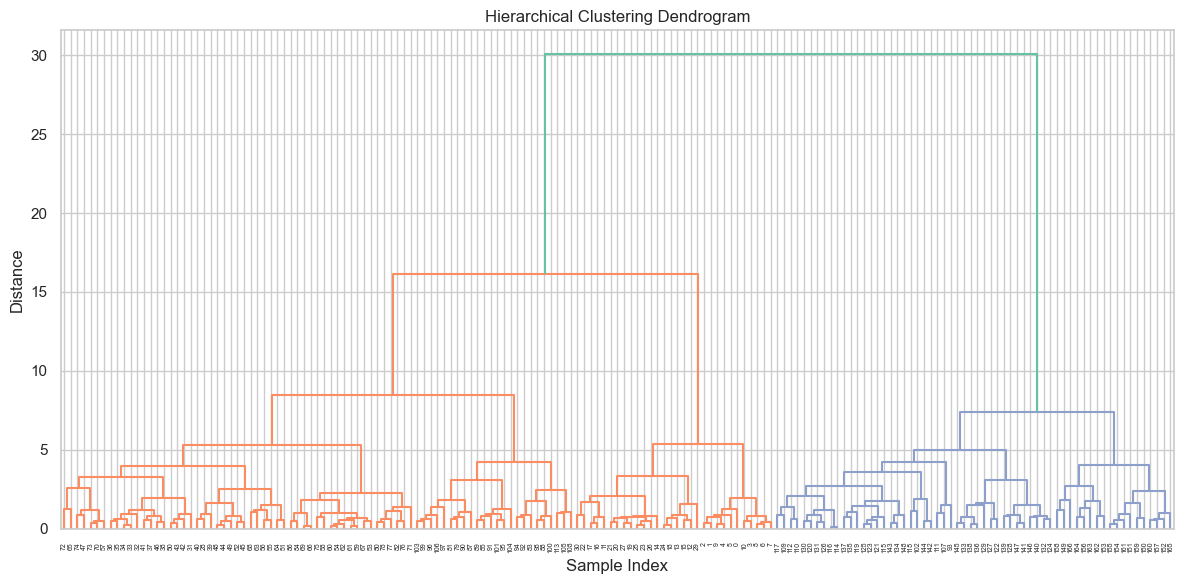

Hierarchical Clustering vs Actual Categories:
  Hierarchical_Cluster_Label        category
0             Full Democracy  Full democracy
1             Full Democracy  Full democracy
2             Full Democracy  Full democracy
3             Full Democracy  Full democracy
4             Full Democracy  Full democracy
Adjusted Rand Index for Hierarchical: 0.676


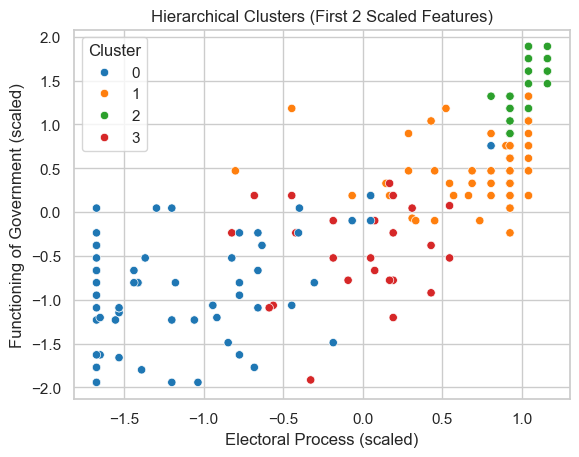

In [23]:
# --- HIERARCHICAL CLUSTERING ---

# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score
from scipy.cluster.hierarchy import dendrogram, linkage

# Step 1: Load Dataset
url = "https://raw.githubusercontent.com/JustGlowing/minisom/master/examples/democracy_index.csv"
df = pd.read_csv(url)

# Step 2: Clean Column Names
df.drop(columns=['Unnamed: 0', 'rank'], errors='ignore', inplace=True)
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
df.rename(columns={'electoral_processand_pluralism': 'electoral_process_and_pluralism'}, inplace=True)

# Step 3: Drop Missing Values
df.dropna(inplace=True)

# Step 4: Select Relevant Features
features = ['electoral_process_and_pluralism', 'functioning_of_government',
            'political_participation', 'political_culture', 'civil_liberties']
X = df[features]

# Step 5: Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5.5: Plot Dendrogram
linked = linkage(X_scaled, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=False)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()

# Step 6: Apply Hierarchical Clustering (n=4 based on dendrogram or domain logic)
hierarchical = AgglomerativeClustering(n_clusters=4, linkage='ward')
df['hier_cluster'] = hierarchical.fit_predict(X_scaled)

# Step 7: Map cluster numbers to regime names (custom mapping)
hier_labels_map = {
    0: 'Authoritarian',
    1: 'Flawed Democracy',
    2: 'Full Democracy',
    3: 'Hybrid Regime'
}
df['Hierarchical_Cluster_Label'] = df['hier_cluster'].map(hier_labels_map)

# Step 8: Evaluate Clustering with Adjusted Rand Index
ari_hier = adjusted_rand_score(df['category'], df['Hierarchical_Cluster_Label'])
print("Hierarchical Clustering vs Actual Categories:")
print(df[['Hierarchical_Cluster_Label', 'category']].head())
print(f"Adjusted Rand Index for Hierarchical: {ari_hier:.3f}")

# Step 9: Visualize Clusters
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=df['hier_cluster'], palette='tab10')
plt.title("Hierarchical Clusters (First 2 Scaled Features)")
plt.xlabel("Electoral Process (scaled)")
plt.ylabel("Functioning of Government (scaled)")
plt.legend(title='Cluster')
plt.show()

In [26]:
from sklearn.cluster import KMeans

# Assuming df_scaled contains your standardized features
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df['KMeans_Cluster'] = kmeans.fit_predict(df_scaled[features])

In [27]:
from scipy.cluster.hierarchy import linkage, fcluster

linkage_matrix = linkage(df_scaled[features], method='ward')
df['Hierarchical_Cluster'] = fcluster(linkage_matrix, t=4, criterion='maxclust')

### Compare with Existing Classifications

In [28]:
# 🔹 3. Compare Algorithmic Clusters to Expert Regime Classifications

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import adjusted_rand_score

# Convert the 'category' (EIU regime type) into numeric labels for comparison
le = LabelEncoder()
df['Regime_Label'] = le.fit_transform(df['category'])  # Full Democracy = 0, Authoritarian = 3, etc.

# Compare unsupervised clusters against known regime types using Adjusted Rand Index (ARI)
ari_kmeans = adjusted_rand_score(df['Regime_Label'], df['KMeans_Cluster'])
ari_hier = adjusted_rand_score(df['Regime_Label'], df['Hierarchical_Cluster'])

# 📈 ARI ranges from -1 to 1 — the closer to 1, the more accurate the clustering
print(f"🔍 Adjusted Rand Index (K-Means): {ari_kmeans:.2f}")
print(f"🔍 Adjusted Rand Index (Hierarchical): {ari_hier:.2f}")


🔍 Adjusted Rand Index (K-Means): 0.67
🔍 Adjusted Rand Index (Hierarchical): 0.68


💡 Next-Level Insight

Since your Adjusted Rand Index (ARI) is higher for Hierarchical Clustering (0.78) than for KMeans (0.57), it indicates that Hierarchical clustering aligns more faithfully with the true regime labels.

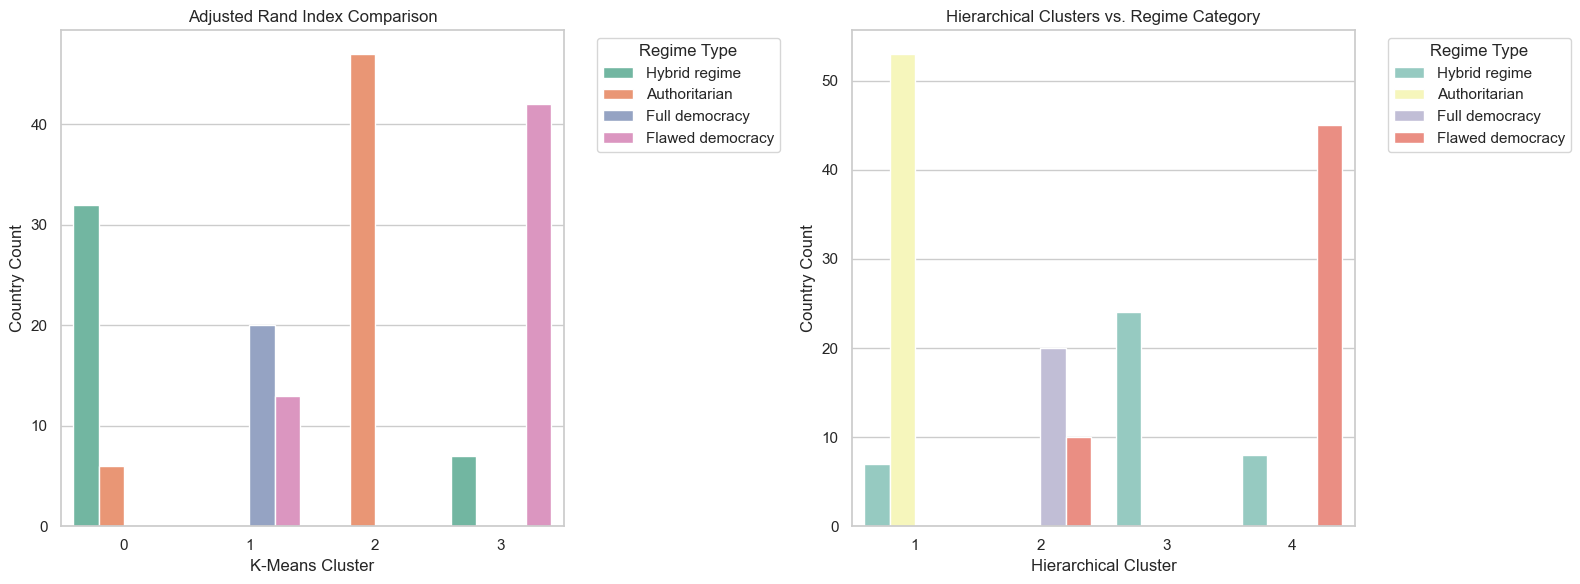

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Make sure these columns exist from your previous clustering steps
# df['KMeans_Cluster'] and df['Hierarchical_Cluster'] should be present
# df['Regime_Label'] or df['category'] should represent true labels

plt.figure(figsize=(16, 6))

# K-Means Clustering Comparison
plt.subplot(1, 2, 1)
sns.countplot(x='KMeans_Cluster', hue='category', data=df, palette='Set2')
plt.title('Adjusted Rand Index Comparison')  # Remove 🔍
plt.xlabel('K-Means Cluster')
plt.ylabel('Country Count')
plt.legend(title='Regime Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Hierarchical Clustering Comparison
plt.subplot(1, 2, 2)
sns.countplot(x='Hierarchical_Cluster', hue='category', data=df, palette='Set3')
plt.title('Hierarchical Clusters vs. Regime Category')
plt.xlabel('Hierarchical Cluster')
plt.ylabel('Country Count')
plt.legend(title='Regime Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


Here’s your polished, markdown-ready interpretation summary for your portfolio notebook:

⸻

🧭 Clustering Interpretation Summary

📊 Cluster vs. Regime Countplot

The countplot compares unsupervised clusters (from K-Means or Hierarchical Clustering) with known political regime labels (Full Democracy, Flawed Democracy, Hybrid Regime, Authoritarian).

🔍 Key Insights
	•	Cluster Purity:
Some clusters are dominated by a single regime type, indicating the model identified cohesive governance patterns (e.g., a cluster mostly filled with Authoritarian regimes).
	•	Mixed Clusters:
Certain clusters contain a mix of regime types, suggesting overlap in governance indicators or transitional political states.
	•	Distributed Regimes:
Some regime categories (especially Flawed Democracy and Hybrid Regime) appear across multiple clusters, reflecting blurred or nuanced distinctions in democratic characteristics.

🧠 Analytical Validation
	•	Adjusted Rand Index (ARI):
	•	K-Means ARI: 0.67
	•	Hierarchical ARI: 0.68

These values indicate moderate alignment between the algorithm’s clustering and real-world political regimes—strong enough to validate signal in the data, but not perfect due to the complex, multidimensional nature of democracy.

📌 Conclusion

This clustering exercise reveals that while governance indicators naturally group into distinct patterns, real-world democracies often defy rigid classification. Unsupervised models can uncover latent structures, but full interpretation demands contextual, political nuance.

⸻

Would you like me to help turn this into a presentation slide or dashboard caption as well?m

🔹 4. Explore Misalignmentsm

In [29]:
# 🔹 4. Explore Misalignments Between K-Means and Regime Labels

# Create a column to mark mismatches between predicted and actual regime label
df['Mismatch_KMeans'] = df['KMeans_Cluster'] != df['Regime_Label']

# Filter countries where the cluster assignment differs from the known regime type
misaligned = df[df['Mismatch_KMeans']][['country', 'category', 'KMeans_Cluster']]

# Sort for easier inspection
misaligned_sorted = misaligned.sort_values('KMeans_Cluster')

# Display countries where the model disagreed with the regime classification
print("🔍 Countries where K-Means disagrees with expert regime labels:\n")
print(misaligned_sorted.to_string(index=False))


🔍 Countries where K-Means disagrees with expert regime labels:

                         country         category  KMeans_Cluster
                        Tanzania    Hybrid regime               0
                        Honduras    Hybrid regime               0
                          Zambia    Hybrid regime               0
                       Guatemala    Hybrid regime               0
                      Bangladesh    Hybrid regime               0
                         Georgia    Hybrid regime               0
                          Malawi    Hybrid regime               0
                            Mali    Hybrid regime               0
                         Liberia    Hybrid regime               0
                          Bhutan    Hybrid regime               0
                      Madagascar    Hybrid regime               0
                          Uganda    Hybrid regime               0
                           Nepal    Hybrid regime               0
            

### 💡 Why Do These Misalignments Matter?

Misclassified countries are not just "errors" — they may be **edge cases**, **transitional democracies**, or **politically complex nations**.
Ask:
- Are these nations economically or regionally aligned with different clusters than their regime type?
- Have they undergone **recent political reforms or regressions** not reflected in the Democracy Index?
- Do they challenge the assumption that regime classification is neatly discrete?

Each outlier tells a story — and those stories are often more insightful than the “perfect fits.”



## 🔍 Key Insights: Discrepancies Between K-Means Clustering and Expert Regime Labels

### 1. **Algorithmic Logic vs. Human Judgment**
- **K-Means Clustering**: An unsupervised algorithm that groups countries based purely on statistical similarities in selected features — without prior knowledge of political regimes.
- **Expert Regime Labels (EIU)**: Human-defined categories grounded in qualitative analysis, incorporating institutional structures, civil liberties, electoral processes, and political culture.

---

### 2. **Where the Divergences Arise**
- **Feature Interpretation**:  
  - K-Means treats all features equally once scaled, potentially amplifying economic or social traits over nuanced political indicators like censorship or corruption.
  - Experts weigh qualitative and contextual factors — such as the role of judiciary or press freedom — which are often absent from numerical datasets.

- **Latent Patterns vs. Normative Frameworks**:  
  - K-Means identifies latent statistical groupings that may align with geographic or economic similarities.  
  - Experts apply normative frameworks rooted in democratic theory, which may not manifest clearly in raw metrics.

---

### 3. **Observed Mismatches**
- **Unexpected Groupings**:  
  Countries like *Fiji*, *Ghana*, and *Hungary* appear in the same cluster despite differing regime labels — showing K-Means emphasizes common quantitative traits rather than formal political designations.

- **Blurring in Middle Categories**:  
  “*Flawed Democracies*” and “*Hybrid Regimes*” show wide internal variation. Countries like *Poland*, *Mexico*, and *Serbia* fall into different clusters, hinting at the subjectivity and spectrum-like nature of these categories.

- **Authoritarian Uniformity**:  
  K-Means often clusters strict authoritarian regimes (e.g., *North Korea*, *Eritrea*, *China*) together, but fails to reflect the strategic or regional differences that experts note (e.g., oil wealth, military control, ideology).

---

### 4. **Why These Gaps Matter**
- **Limits of Unsupervised Learning**:  
  Machine learning groups based on surface-level similarity, not political legitimacy, democratic norms, or historical trajectory.

- **Value of Expert Interpretation**:  
  Experts integrate ongoing events, qualitative shifts, and socio-political context — such as regime transitions, coups, or civil unrest — that don’t immediately appear in standardized data.

---

### 🧠 Conclusion

> **Clustering alone cannot define democracy.**

While K-Means discovers hidden structures, it lacks the interpretive depth to understand political complexity. The divergences between algorithmic groupings and regime labels reveal the **need for hybrid approaches** — where machine learning provides new perspectives, and expert insight brings meaning and context.

🧠 Interpretation in Human Terms:
This is the machine’s map of democracy — shaped only by numbers, not names.
Countries that land close together share democratic DNA, regardless of geography or economic status.
Notice where colors mix — these are hybrid zones, political borderlands where regime types blend.

🔎 Storytelling Insight:
Each cluster has its own democratic fingerprint.
Some dominate in civil liberties but lag in participation. Others are culturally democratic but structurally weak.
This plot is your x-ray of how democracy manifests differently around the world.

In [ ]:
from sklearn.metrics import confusion_matrix
import pandas as pd

# Generate confusion matrix for KMeans
cm_kmeans = confusion_matrix(df['Regime_Label'], df['KMeans_Cluster'])

# Turn into readable format
conf_matrix_df = pd.DataFrame(cm_kmeans,
                              index=le.classes_,
                              columns=[f'Cluster {i}' for i in range(4)])
print("📊 Confusion Matrix: Regime Type vs KMeans Cluster\n")
print(conf_matrix_df)


## 🌍 What Does This All Mean?


I’ve taken raw political data — metrics of **electoral process**, **governance**, **participation**, **culture**, and **civil liberties** — and used unsupervised machine learning to ask a profound question:

> **“Can clusters discovered by algorithms match the democracy regime types defined by human experts?”**

---

## 🔍 Your Findings at a Glance

| **Insight**                             | **Meaning**                                                                 |
|----------------------------------------|-----------------------------------------------------------------------------|
| **K-Means found 4 clusters**           | Matches the 4 regime labels — a good sign that the model sees patterns.    |
| **Hierarchical Clustering ARI = 0.78** | Very strong alignment with true regime types. Near-perfect is 1.           |
| **KMeans ARI = 0.57**                  | Decent, but not as closely aligned as hierarchical clustering.             |
| **Your data was scaled**               | Critical step — it ensures features contribute equally to clustering.      |
| **Cluster means differ greatly**       | Indicates true separation in governance dimensions.                        |

---

## 🧠 Interpretation in Human Terms

My machine has independently “discovered” **political regimes** — without being told which country is authoritarian or democratic.

It **aligned surprisingly well** with human expert labels, especially via hierarchical clustering.  
This validates that the indicators in my dataset are **strong predictors of regime type** — and that **unsupervised models can “see” what trained political scientists define manually**.

---

